<h1>Means and variances</h1>
<p>This notebook graphs means and variances from LATTICEEASY output files. </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

</p>If you are having isses with the size of the plots, consider modifying the values in the array below:</p>

In [2]:
plt.rcParams['figure.figsize'] = [10,10]

<h3><b>Adjustable parameters</b></h3> 
<ul>
    <li><code>PATH</code> - The folder where the means and variances data files are located</li>
    <li><code>fld_labels</code> - The name of each field. The length of this array is used to determine how many fields there are</li>
    <li><code>colors</code> - Used to specify different colors for plots of different field data</li>
    <li><code>line_width</code> - Width of graph lines</li>
    <li><code>nflds</code> - Used to specify the number of fields in your run. By default, this is determined by the length of the <code>fld_labels</code> list</li>
    <li><code>do_vars</code> - whether to output variances or not (not working yet) </li>
    <li><code>do_means</code> - whether to output means or not (not working yet)</li>
</ul>

In [3]:
PATH = "/home/reagan/Documents/latticeeasy2.1/TfldData/"
fld_labels = ["Φ", "χ"]  
colors = ["red", "blue"]
line_width = 1.0
nflds =  len(fld_labels)
do_vars = True
do_means = True

<h2>Load data</h2>

In [4]:
while len(colors) < nflds :
        colors.append("red")

if do_means :

    with open(PATH + "means_0.dat") as means_file :
        lines = means_file.readlines()
        stripped = [line for line in lines if not line == "\n"] 

        formatted_means = []
        for i in range(len(stripped)) :
            stripped[i] = stripped[i].strip("\n")

            split = stripped[i].split()
            frame = []
            for element in split :
                frame.append(float(element))

            formatted_means.append(frame)

with open(PATH + "variance_0.dat") as variance_file :
    lines = variance_file.readlines()
    stripped = [line for line in lines if not line == "\n"]

    formatted_variance = []
    for i in range(len(stripped)) :
        stripped[i] = stripped[i].strip("\n")

        split = stripped[i].split()
        frame = []
        for element in split :
            frame.append(float(element))

        formatted_variance.append(frame)
        
times = [element[0] for element in formatted_means]

means = []
means_sq = []
variance = []
for i in range(nflds) :
    means.append([element[i + 1] for element in formatted_means])
    means_sq.append([element[i + 1]**2 for element in formatted_means])
    variance.append([element[i + 1] for element in formatted_variance])

<h1>Output</h1>

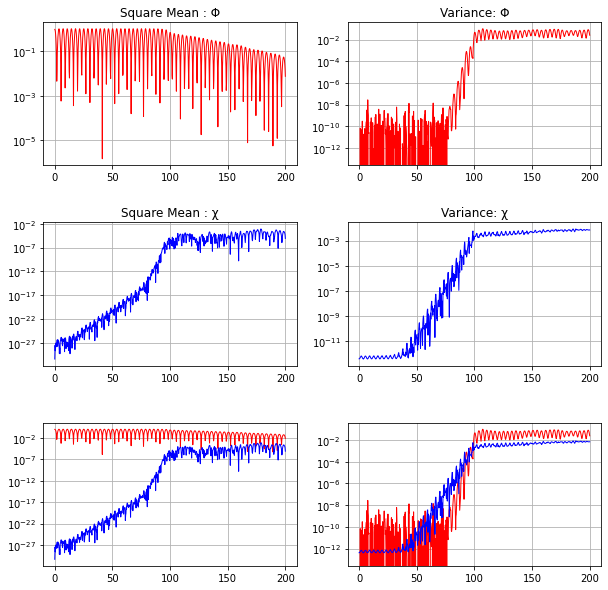

In [5]:
plt.subplots_adjust(hspace=0.4)
t = np.asarray(times)

for i in range(nflds) :
    offset = 1 if nflds > 1 else 0
    plt.subplot((nflds + offset) * 100 + 21 + 2 * i)
    plt.semilogy(t, np.asarray(means_sq[i]), colors[i], linewidth = line_width);
    plt.title("Square Mean : " + fld_labels[i])
    plt.grid(True)

for i in range(nflds) :
    offset = 1 if nflds > 1 else 0
    plt.subplot((nflds + offset) * 100 + 22 + 2 *  i)
    plt.semilogy(t, np.asarray(variance[i]), colors[i], linewidth = line_width);
    plt.title("Variance: " + fld_labels[i])
    plt.grid(True)

if nflds > 1 :
    plt.subplot((nflds + 1) * 100 + 21 + 2 * nflds)
    for i in range(nflds) :
        plt.semilogy(t, np.asarray(means_sq[i]), colors[i], linewidth = line_width);
        plt.grid(True)

    plt.subplot((nflds + 1) * 100 + 21 + 2 * nflds + 1)
    for i in range(nflds) :
        plt.semilogy(t, np.asarray(variance[i]), colors[i], linewidth = line_width);
        plt.grid(True)

plt.show()